<a href="https://colab.research.google.com/github/riturajs19/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Collection and Preprocessing

In [16]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
## To get the info of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
# To see how much null values are present
print(df['Cabin'].isnull().sum())
print(df['Age'].isnull().sum())

687
177


In [19]:
## How big is the data
df.shape

(891, 12)

In [20]:
## To describe data mathematically
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Handling Missing Values

In [21]:
#As CABIN columns is almost having null values and it will not give any true value, therefore we will remove it
df.drop(columns ='Cabin',axis=1, inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [22]:
## Now for AGE column we cannot remove it , instead we will impute it with mean column
df['Age'].fillna(df['Age'].mean(), inplace = True)

<ipython-input-22-223cbccb5461>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


In [23]:
## Now we will find the mode for EMBARKED column
df['Embarked'].mode()[0]

'S'

In [24]:
## Using this mode we will fit this in EMBARKED column to remove 2 missing values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df.isnull().sum()

<ipython-input-24-1a38a3fb0217>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [25]:
# Now we will find the no of people SURVIVED
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


# Data Visualization


<Axes: xlabel='Survived', ylabel='count'>

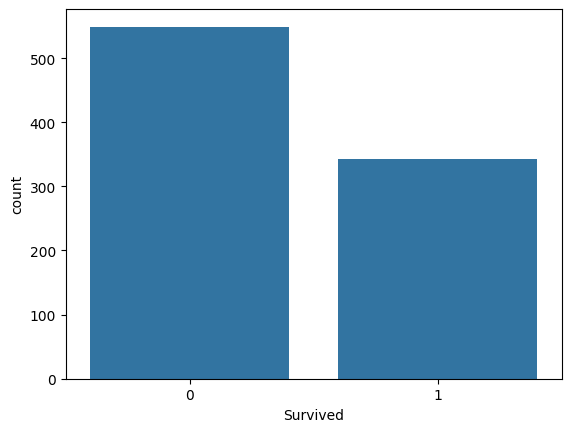

In [26]:
# Making countplot for survived column
sns.countplot(x = 'Survived', data = df)

<Axes: xlabel='Sex', ylabel='count'>

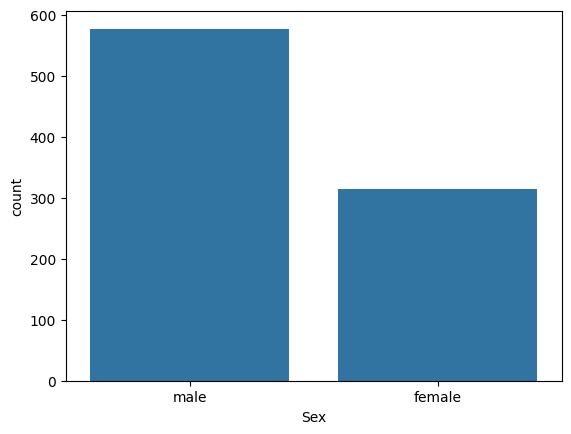

In [27]:
## Making countplot for Sex column
sns.countplot(x = 'Sex', data = df)

<Axes: xlabel='Sex', ylabel='count'>

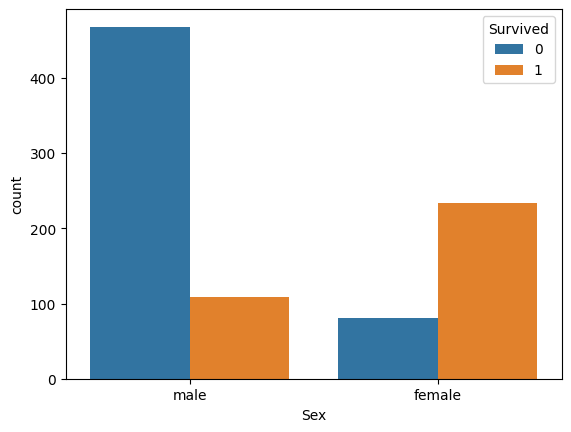

In [28]:
## Number of survivors gender wise plot
sns.countplot(x = 'Sex', hue = 'Survived', data = df)

<Axes: xlabel='Pclass', ylabel='count'>

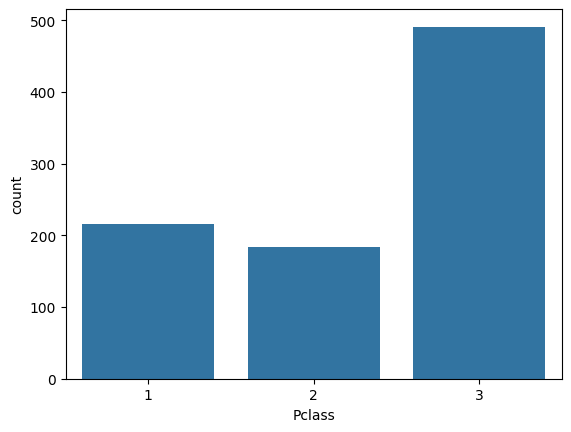

In [29]:
# MAKING COUNTPLOT FOR pclASS COLUMN
sns.countplot(x = 'Pclass', data = df)

<Axes: xlabel='Pclass', ylabel='count'>

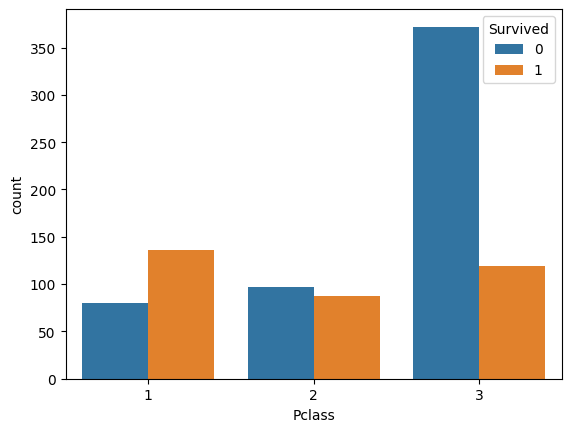

In [31]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)

In [32]:
df.drop(columns = ['Name', 'PassengerId', 'Ticket'], axis= 1, inplace = True)

In [36]:
df['family_size'] = df['SibSp'] + df['Parch'] +1
df.drop(columns = ['SibSp', 'Parch'], axis = 1, inplace = True)

In [37]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.000000,7.2500,S,2
1,1,1,female,38.000000,71.2833,C,2
2,1,3,female,26.000000,7.9250,S,1
3,1,1,female,35.000000,53.1000,S,2
4,0,3,male,35.000000,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,1
887,1,1,female,19.000000,30.0000,S,1
888,0,3,female,29.699118,23.4500,S,4
889,1,1,male,26.000000,30.0000,C,1


# Encoding the categorical value

In [38]:
# prompt: convert the categorical value like age and embarked into numerical

df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
df.head()

<ipython-input-38-02529dd9a9ba>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,0,22.0,7.2500,0,2
1,1,1,1,38.0,71.2833,1,2
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,0,2
4,0,3,0,35.0,8.0500,0,1


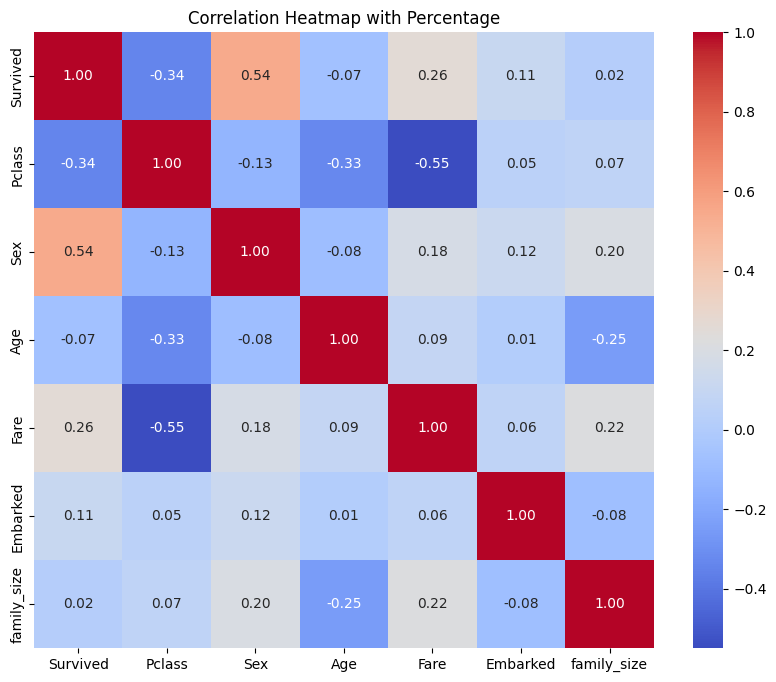

In [40]:
#provide percentage feature in heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap with Percentage')
plt.show()

# Model Training

In [42]:
X = df.drop('Survived', axis = 1)
Y= df['Survived']

In [43]:
# Split the data into train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [44]:
# Now we will use Logistic Regression
lr = LogisticRegression()

In [47]:
# Now we will the training data
trained_model = lr.fit(X_train, Y_train)

In [48]:
# Now we will predict for X_test
y_pred = trained_model.predict(X_test)

In [50]:
## Now we will find accuracy score
accuracy_score(Y_test, y_pred)

0.8100558659217877

# Using Random Forest

In [52]:
# Now we will use random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [53]:
# Now we will predict the accuracy score
accuracy_score(Y_test, y_pred)

0.8212290502793296